<h1>DSCI-552 HW 1</h1>
<br>
<font size="4">Sina Heydari, sinaheyd@usc.edu <br>  <br>Github username: sinaheydariGIT </font>




In [1]:
# importing necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## (b) Pre-Processing and Exploratory data analysis

In [2]:
# col_set are the header names of every column 
col_set = ['pelv inc', 'pelv tilt', 'lumb angle', 'sac slope', 'pelv rad','spond grade','normality']

# reading the dataset in a pandas data frame
df = pd.read_table('../data/column_2C.dat', sep = ' ', 
              header = None, names = col_set)

# binary classification of the labels into 0 (NO) and 1(AB) in the outcome column
df['outcome'] = df['normality'].map(lambda x: int(x == 'AB'))
df

,pelv inc,pelv tilt,lumb angle,sac slope,pelv rad,spond grade,normality,outcome
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0


#### (b-i) make scatterplots of the ind. variables in the dataset. Use colors to show classes 0 and 1

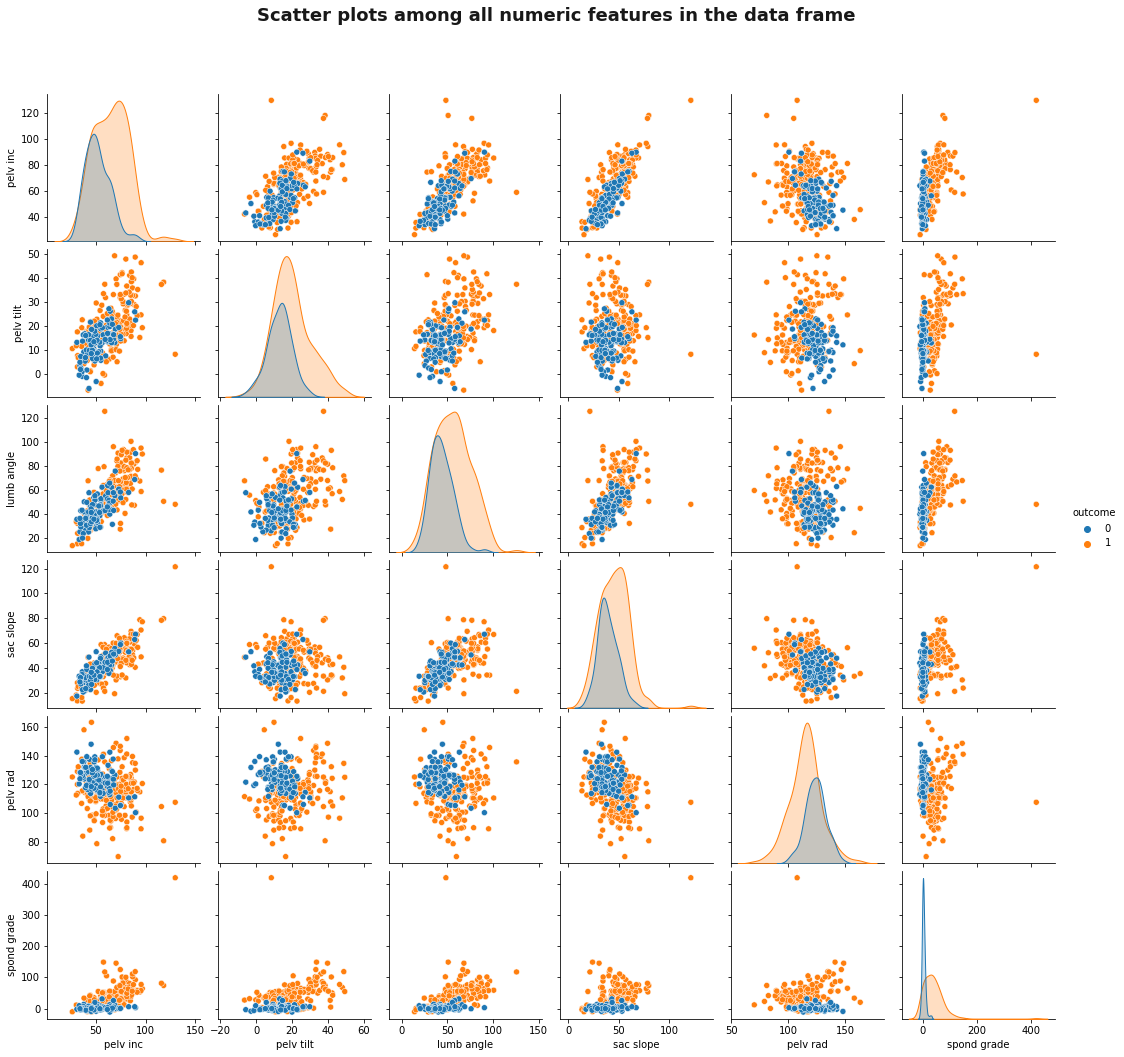

In [3]:
# making an array of columns names for ind. variables (features)
feat = ['pelv inc', 'pelv tilt', 'lumb angle', 'sac slope', 'pelv rad','spond grade']

# (i) make scatterplots of the independent variables in the dataset. Use colors to show classes 0 and 1
pairplot_fig = sns.pairplot(df, vars=feat, hue='outcome')
plt.subplots_adjust(top=0.9)
pairplot_fig.fig.suptitle("Scatter plots among all numeric features in the data frame", fontsize=18, alpha=0.9, weight='bold')
plt.show()

#### (b-ii) Make box plots for each ind. variable. use color to show classes 0 and 1

<AxesSubplot:xlabel='outcome', ylabel='spond grade'>

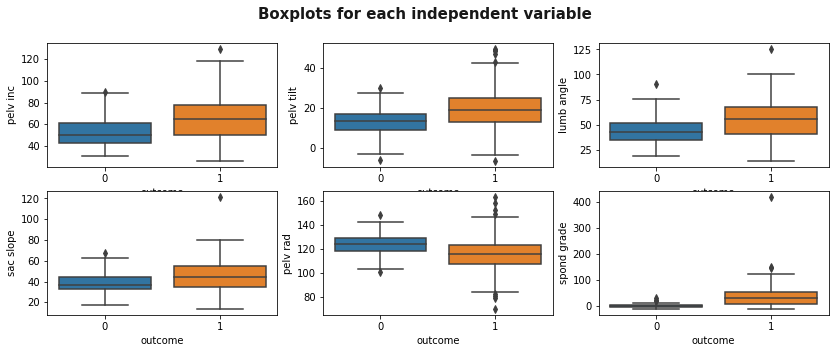

In [4]:
# (ii) make box plots for each ind. variable. use color to show classes 0 and 1
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.suptitle('Boxplots for each independent variable',fontsize=15, alpha=0.9, weight='bold')
sns.boxplot(ax=axes[0, 0], data=df, x='outcome', y=feat[0])
sns.boxplot(ax=axes[0, 1], data=df, x='outcome', y=feat[1])
sns.boxplot(ax=axes[0, 2], data=df, x='outcome', y=feat[2])
sns.boxplot(ax=axes[1, 0], data=df, x='outcome', y=feat[3])
sns.boxplot(ax=axes[1, 1], data=df, x='outcome', y=feat[4])
sns.boxplot(ax=axes[1, 2], data=df, x='outcome', y=feat[5])

#### (b-iii) Select the first 70 rows of class 0 and 140 rows of class 1 as the training set and rest as testing set

In [5]:
# (iii) Select the first 70 rows of class 0 and 140 rows of class 1 as the training set and rest as testing set
train0 = df.loc[df['outcome'] == 0][:70]
train1 = df.loc[df['outcome'] == 1][:140]
train_data = pd.concat([train0, train1])

test0 = df.loc[df['outcome'] == 0][70:]
test1 = df.loc[df['outcome'] == 1][140:]
test_data = pd.concat([test0, test1])

## (c) Classification using KNN

#### (c-i) Write code for k-nearest neighbors 

In [6]:
# (i) Compute KNN for different number of neighbors (k) and compute error (1-score)

from sklearn.neighbors import KNeighborsClassifier
test_error = []
train_error = []
# error_rate = []
kn = range(1,211,3)
for k in kn:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data[feat], train_data['outcome'])
    temp_score = neigh.score(test_data[feat], test_data['outcome'])
    test_error.append(1-temp_score)
    
    temp_score = neigh.score(train_data[feat], train_data['outcome'])
    train_error.append(1-temp_score)
#     pred_i = neigh.predict(train_data[feat])
#     error_rate.append(np.mean(pred_i != train_data['outcome']))


#### (c-ii) plot train and test error for a range of k

Text(0.5, 1.0, 'Error rate vs number of neighbors (k)')

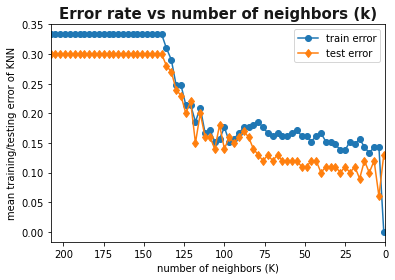

In [7]:
# (ii) plot accuracy of KNN as a function of number of neighbors 
fig, ax = plt.subplots()
ax.plot(kn, train_error,'-o', label="train error")
ax.plot(kn, test_error,'-d', label="test error")
ax.set_xlabel('number of neighbors (K)')
ax.set_ylabel('mean training/testing error of KNN')
ax.set_xlim(kn[-1], 0)
ax.legend()
ax.set_title('Error rate vs number of neighbors (k)',fontsize=15, alpha=0.9, weight='bold')



In [8]:
# (ii) find the best accuracy 
min_error = min(test_error)
k_star = kn[test_error.index(min_error)]
print('Best k value (in terms of min error or max mean accuracy or) is =', k_star)
print('min test error is =', min_error)

Best k value (in terms of min error or max mean accuracy or) is = 4
min test error is = 0.06000000000000005


#### (c-ii) Calculate confusion matrix, true pos, true neg rate, percision and F1-score for k = k*

In [9]:
# (ii) calculate confusion matrix, true positive rate, true neg rate, percision .... 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier(n_neighbors=k_star)
neigh.fit(train_data[feat], train_data['outcome'])
y_true = test_data['outcome']
y_pred = neigh.predict(test_data[feat])
CM = confusion_matrix(y_true, y_pred)
TN = CM[0,0]
FN = CM[1,0]
FP = CM[0,1]
TP = CM[1,1]
PS = precision_score(y_true, y_pred) # percision score = TP/(TP + FP)
f1 = f1_score(y_true, y_pred)

print('For k = k* = 4')
print('True negative rate = ', TN/(TN+FP))
print('True positive rate = ', TP/(TP + FN))
print('Percision (TP/(TP+FP)) = ',PS)
print('F1_score = ', f1)

For k = k* = 4
True negative rate =  0.8333333333333334
True positive rate =  0.9857142857142858
Percision (TP/(TP+FP)) =  0.9324324324324325
F1_score =  0.9583333333333333


#### (c-iii) Plot the best test error rate obtained by some value of k against the size of training set

In [10]:
# helper function for easier computation of max accuracy and optimal k for every training data
def findBestK(trn, tst, N, dist_p, dist_metric):
    score = []
    kn = range(1,N,5)
    for k in kn:
        neigh = KNeighborsClassifier(n_neighbors=k, p=dist_p, metric=dist_metric)
        #neigh = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'V': np.cov(trn[feat])})
        neigh.fit(trn[feat], trn['outcome'])
        temp_score = neigh.score(tst[feat], tst['outcome'])
        score.append(temp_score)
    max_score = max(score)
    k_star = kn[score.index(max_score)]
    return k_star, max_score

In [11]:
# for every N in the given range we run the function findBestK to find best k value and find the best error
N_train = range(10,220,10)
optimal_k = []
optimal_score = []
optimal_error = []

for N in N_train:
    # print(N,N//3,N-N//3)
    tr0 = train0[:N//3]
    tr1 = train1[:N-N//3]
    train_new = pd.concat([tr0, tr1])

    ts0 = test0[:N//3]
    ts1 = test1[:N-N//3]
    test_new = pd.concat([ts0, ts1])
    
    #distance metric param means euclidean distance
    bestK, max_score = findBestK(train_new, test_new, N, 2, 'minkowski')
    optimal_k.append(bestK)
    optimal_score.append(max_score)
    optimal_error.append(1-max_score)


Text(0.5, 0.98, 'Learning curve')

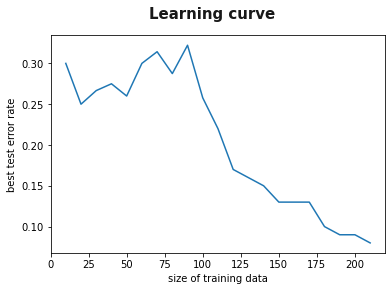

In [12]:
# plot the error rate as a function of N for the best k value 
plt.plot(N_train, optimal_error)
plt.xlabel('size of training data')
plt.ylabel('best test error rate')
plt.suptitle('Learning curve',fontsize=15, alpha=0.9, weight='bold')


## (d) Replace Euclidean metric with other metrics

In [13]:
# (d-i)
# use all of the data
N = 210
train_all = pd.concat([train0[:N//3], train1[:N-N//3]])
test_all = pd.concat([test0[:N//3], test1[:N-N//3]])


# Euclidean distance means distance param = 2
k_euc, score_euc = findBestK(train_all, test_all, N, 2, 'minkowski')
error_euc = 1 - score_euc

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# (a) Manhattan distance means distance param = 1
k_manh, score_manh = findBestK(train_all, test_all, N, 1, 'minkowski')
error_manh = 1 - score_manh
print('k* for manhattan distance is', k_manh)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# (b) log_10(p) ....
error_log = []
powers = np.linspace(1,10,10)/10
p_log = np.power(10, powers)
for i in p_log:
    neigh2 = KNeighborsClassifier(n_neighbors=k_manh, p=i, metric='minkowski')
    neigh2.fit(train_all[feat], train_all['outcome'])
    temp_score = neigh2.score(test_all[feat], test_all['outcome'])
    error_log.append(1-temp_score)
    
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
# (c) Chebyshev distance
k_cheb, score_cheb = findBestK(train_all, test_all, N, [], 'chebyshev' )
error_cheb = 1 - score_cheb

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# (d-ii) Mahalanobis distance
test_error_mah = []
kn = range(1,211,3)
for k in kn:
    X = np.cov(train_all[feat], rowvar = False)
    neigh = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI':np.cov(X,rowvar=False)})
    neigh.fit(train_all[feat], train_all['outcome'])
    temp_score = neigh.score(test_all[feat], test_all['outcome'])
    test_error_mah.append(1-temp_score)
    
error_mah = min(test_error_mah)
k_mah = kn[test_error_mah.index(error_mah)]

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# print the results in a table
error_p = np.concatenate(([error_euc],[error_manh], error_log,[error_cheb], [error_mah]))
dist_p = np.concatenate(([2],[1], p_log, [float('inf')], ['--']))
table_data = {'value of p (distance param)': dist_p, 'test error': error_p}
df_table = pd.DataFrame.from_dict(table_data).round(3)
def row_name(x):
    if x == 0:
        return "Euclidean"
    if x == 1:
        return "Manhattan"
    if x == 12:
        return "Chebyshev"
    if x == 13:
        return "Mahalanobis"
    return "log(p) = {0:.1f}".format((x-1) / 10)

df_table.index = df_table.index.map(row_name)
pd.options.display.float_format = '{:.3f}'.format
print(df_table)
print("\n Best log10(p) is =", np.log10(p_log[error_log.index(min(error_log))]) )

k* for manhattan distance is 6
             value of p (distance param)  test error
Euclidean                              2       0.080
Manhattan                              1       0.110
log(p) = 0.1          1.2589254117941673       0.090
log(p) = 0.2          1.5848931924611136       0.090
log(p) = 0.3          1.9952623149688795       0.080
log(p) = 0.4            2.51188643150958       0.080
log(p) = 0.5          3.1622776601683795       0.080
log(p) = 0.6          3.9810717055349722       0.060
log(p) = 0.7           5.011872336272722       0.070
log(p) = 0.8           6.309573444801933       0.080
log(p) = 0.9           7.943282347242816       0.090
log(p) = 1.0                        10.0       0.090
Chebyshev                            inf       0.080
Mahalanobis                           --       0.040

 Best log10(p) is = 0.6


## (e) Replace Majority polling with weighted decision 


  dist metric  value of p  test error
0   Euclidean       2.000       0.110
1   Manhattan       1.000       0.100
2   Chebyshev         inf       0.110


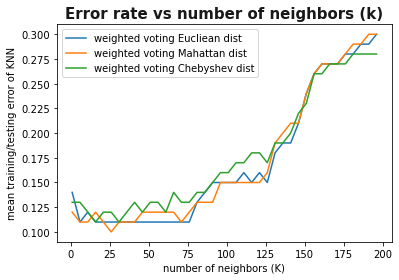

In [14]:
# helper function for easier computation of max accuracy and optimal k for every training data with weighted polling
def findBestK_weighted(trn, tst, N, dist_p, dist_metric):
    err = []
    kn = range(1,N,5)
    for k in kn:
        #neigh = KNeighborsClassifier(n_neighbors=k)
        neigh_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance', p=dist_p, metric=dist_metric)
        neigh_weighted.fit(trn[feat], trn['outcome'])
        temp_err = 1 - neigh_weighted.score(tst[feat], tst['outcome'])
        err.append(temp_err)
    min_err = min(err)
    k_star = kn[err.index(min_err)]
    return k_star, min_err, err


N = 201
train_all = pd.concat([train0[:N//3], train1[:N-N//3]])
test_all = pd.concat([test0[:N//3], test1[:N-N//3]])

# Euclidean distance means distance param = 2
k_euc_w, best_err_euc_w, all_err_euc_w = findBestK_weighted(train_all, test_all, N, 2, 'minkowski')

# Manhattan distance means distance param = 1
k_manh_w, best_err_manh_w, all_err_manh_w = findBestK_weighted(train_all, test_all, N, 1, 'minkowski')

# Chebyshev distance for p -> inf
k_cheb_w, best_err_cheb_w, all_err_cheb_w = findBestK_weighted(train_all, test_all, N, [], 'chebyshev')


# print the results in a table
error_p = np.concatenate(([best_err_euc_w],[best_err_manh_w],[best_err_cheb_w]))
dist_p = np.concatenate(([2],[1], [float('inf')]))
dist_metric = ["Euclidean","Manhattan","Chebyshev"]
table_data = {'dist metric':dist_metric,'value of p': dist_p, 'test error': error_p}
df_table = pd.DataFrame.from_dict(table_data).round(2)


fig, ax = plt.subplots()
ax.plot(range(1,N,5), all_err_euc_w, label="weighted voting Eucliean dist")
ax.plot(range(1,N,5), all_err_manh_w, label="weighted voting Mahattan dist")
ax.plot(range(1,N,5), all_err_cheb_w, label="weighted voting Chebyshev dist")

# plt.plot(kn, error_rate, label=" error")
ax.set_xlabel('number of neighbors (K)')
ax.set_ylabel('mean training/testing error of KNN')
# ax.set_xlim(kn[-1], 0)
ax.legend()
ax.set_title('Error rate vs number of neighbors (k)',fontsize=15, alpha=0.9, weight='bold')

pd.options.display.float_format = '{:.3f}'.format
print(df_table)



#### (f) The lowest trainign error in this HW?
The lowest training error was 0 for k (number of neighbors)  = 1, this is consistent with what was discussed in the lectures about very small number of neighbors leading to overfitting. In other words, each point is only being classified based on its own label which leads to overfitting.